In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set({"figure.figsize":(17,8)})
sns.set(font_scale = 1.15)

In [2]:
# Nos traemos el data set 
df = pd.read_csv("../../Raw Data/atp_players.csv",encoding = "ISO-8859-1")

In [3]:
df.head(3)

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122,USA,NaN,Q54544
1,100002,Pancho,Segura,R,19210620,ECU,NaN,Q54581
2,100003,Frank,Sedgman,R,19271002,AUS,NaN,Q962049


In [4]:
df = df.loc[df["ioc"] != "GBR"]
df = df.loc[df["ioc"] != "USA"]
df = df.loc[df["hand"] != "U"]

In [5]:
#Seleccionamos las columnas que nos interesan
selected_columns = df[["name_last","dob",]]
df = selected_columns.copy()
df.head(3)

,name_last,dob
1,Segura,19210620
2,Sedgman,19271002
3,Merlo,19271011


In [6]:
df = df[df['dob'].notna()]

In [7]:
df['year'] = pd.DatetimeIndex(df['dob']).year
df['month'] = pd.DatetimeIndex(df['dob']).month
df['day'] = pd.DatetimeIndex(df['dob']).day
df.head(3)

,name_last,dob,year,month,day
1,Segura,19210620,1921,6,20
2,Sedgman,19271002,1927,10,2
3,Merlo,19271011,1927,10,11


In [8]:
df = df.loc[df["year"] > 1985]

In [9]:
def trimestres(row):
    if row['month'] < 4 :
        return 1
    elif row['month'] < 7:
        return 2
    elif row['month'] < 10:
        return 3
    else:
        return 4  

In [10]:
df['trimestre'] = df.apply (lambda month: trimestres(month), axis=1)

In [11]:
df['Deporte'] = 'Tenis'

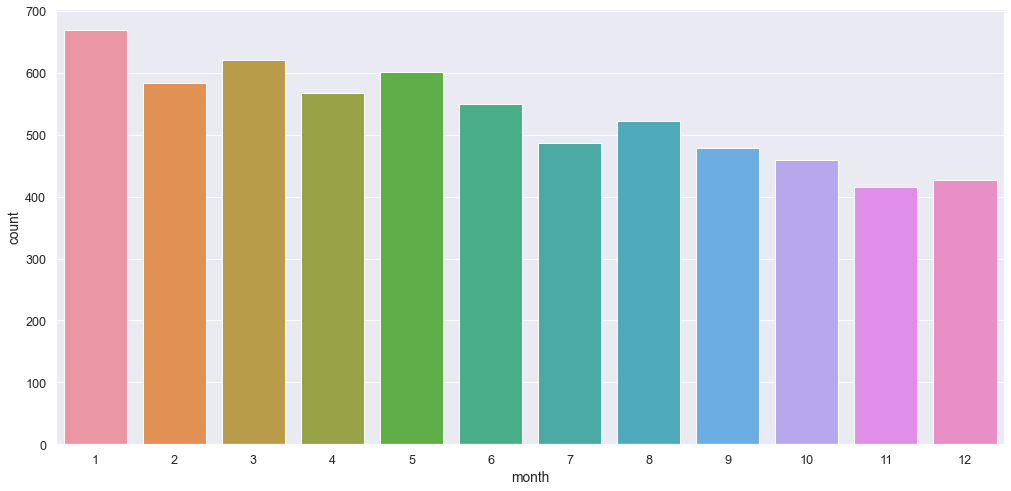

In [12]:
ax = sns.countplot(x="month", data=df)

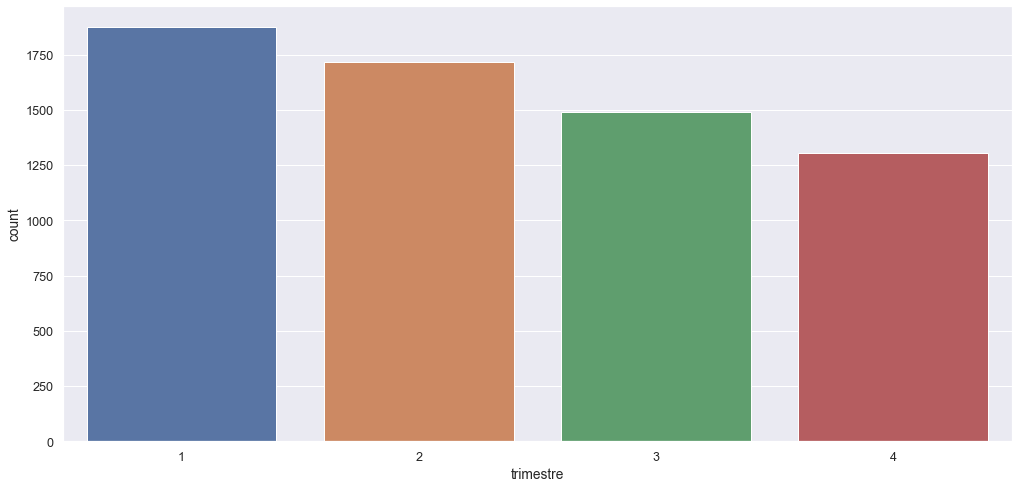

In [13]:
ax = sns.countplot(x="trimestre", data=df)

In [14]:
df.to_csv('../../Data/tenistas.csv', encoding='utf-8')

In [15]:
df.head(3)

,name_last,dob,year,month,day,trimestre,Deporte
643,Zverev,19970420,1997,4,20,2,Tenis
4652,Erguden,19860101,1986,1,1,1,Tenis
4653,Cuevas,19860101,1986,1,1,1,Tenis
